# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [47]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

In [48]:
dados_ro.head(2)

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410


In [49]:
sinasc_raw.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [50]:
sinasc_numerico = sinasc_raw.select_dtypes(include=['int64', 'float64'])
sinasc_numerico.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [51]:
sinasc_raw['latitude'] = pd.cut(sinasc_raw['munResLat'], bins = [-float('inf'), -10.5, float('inf')])

In [52]:
operacoes_lat = {
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}
prova_lat = sinasc_raw.groupby('latitude').agg(operacoes_lat)
prova_lat

C:\Users\Taaznot\AppData\Local\Temp\ipykernel_27228\4130939251.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prova_lat = sinasc_raw.groupby('latitude').agg(operacoes_lat)


QTDGESTANT                                                  \
                     sum      mean  min   max median       std       var   
latitude                                                                   
(-inf, -10.5]    15301.0  1.186032  0.0  15.0    1.0  1.304777  1.702444   
(-10.5, inf]     17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501   

              CONSULTAS                                               
                    sum      mean min max median       std       var  
latitude                                                              
(-inf, -10.5]     48000  3.694297   1   9    4.0  0.643372  0.413928  
(-10.5, inf]      48662  3.467436   1   9    4.0  0.888240  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [53]:
sinasc_raw['area'] = pd.cut(sinasc_raw['munResArea'], bins = [-float('inf'), 3000, float('inf')])

In [54]:
operacoes_area = {
    'CONSPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'MESPRENAT' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}
prova_area = sinasc_raw.groupby('area').agg(operacoes_area)
prova_area

C:\Users\Taaznot\AppData\Local\Temp\ipykernel_27228\3440587930.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prova_area = sinasc_raw.groupby('area').agg(operacoes_area)


CONSPRENAT                                                   \
                      sum      mean  min   max median       std        var   
area                                                                         
(-inf, 3000.0]    44775.0  8.709395  0.0  99.0    8.0  4.290017  18.404248   
(3000.0, inf]    170662.0  8.143825  0.0  99.0    8.0  5.325530  28.361275   

               MESPRENAT                                                    
                     sum      mean  min   max median        std        var  
area                                                                        
(-inf, 3000.0]   19206.0  3.820569  1.0  99.0    2.0  12.092759  146.23481  
(3000.0, inf]   177209.0  9.261472  1.0  99.0    2.0  24.587188  604.52981

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [55]:
sinasc_raw['altitude'] = pd.qcut(sinasc_raw['munResAlt'], q = 3, labels = ['Alto', 'Medio', 'Baixo'])

In [56]:
operacoes_altitude = {
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES' : ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}
prova_altitude = sinasc_raw.groupby('altitude').agg(operacoes_altitude)
prova_altitude

C:\Users\Taaznot\AppData\Local\Temp\ipykernel_27228\2051667741.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prova_altitude = sinasc_raw.groupby('altitude').agg(operacoes_altitude)


QTDPARTNOR                                                  \
                sum      mean  min   max median       std       var   
altitude                                                              
Alto         6271.0  0.802534  0.0  40.0    0.0  1.377551  1.897646   
Medio        5336.0  0.574319  0.0  14.0    0.0  1.139346  1.298109   
Baixo        2964.0  0.368519  0.0  41.0    0.0  1.065716  1.135751   

         QTDPARTCES                                                  
                sum      mean  min   max median       std       var  
altitude                                                             
Alto         3522.0  0.451654  0.0  12.0    0.0  0.736842  0.542936  
Medio        4788.0  0.510611  0.0  12.0    0.0  0.744376  0.554095  
Baixo        4826.0  0.598685  0.0   5.0    0.0  0.750578  0.563368

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [57]:
regioes_map 

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

In [58]:
sinasc_regiao = sinasc_raw.set_index('munResNome')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2019-11-12'),
  Text(0.0, 0, '2019-01-01'),
  Text(50.0, 0, '2019-02-20'),
  Text(100.0, 0, '2019-04-11'),
  Text(150.0, 0, '2019-05-31'),
  Text(200.0, 0, '2019-07-20'),
  Text(250.0, 0, '2019-09-08'),
  Text(300.0, 0, '2019-10-28'),
  Text(350.0, 0, '2019-12-17'),
  Text(400.0, 0, '')])

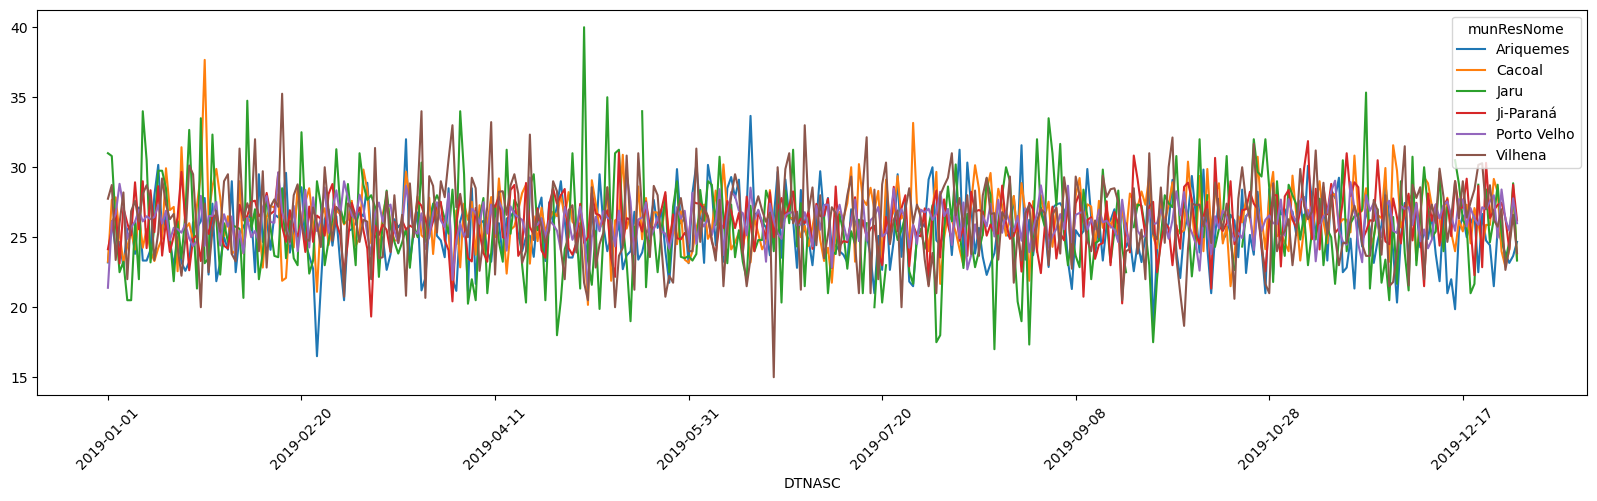

In [59]:
sinasc_regiao.groupby(['DTNASC', regioes_map])['IDADEMAE'].mean().unstack().plot(figsize=[20,5]);
plt.xticks(rotation=45)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [60]:
dados_ro.head(2) 

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410


In [61]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [62]:
dado= dados_ro
idh = dado.set_index('municipio')[['idh']].sort_values(by= 'idh', ascending = False)
idh

,idh
municipio,
Porto Velho,0.736
Vilhena,0.731
Cacoal,0.718
Ji-Paraná,0.714
Pimenta Bueno,0.710
Ariquemes,0.702
Rolim de Moura,0.700
Cerejeiras,0.692
Jaru,0.689


In [63]:
idh_sinasc = sinasc_raw.set_index('munResNome').join(idh, how = 'outer')
idh_sinasc.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,latitude,area,altitude,idh
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,"(-inf, -10.5]","(3000.0, inf]",Baixo,0.641
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,"(-inf, -10.5]","(3000.0, inf]",Baixo,0.641


In [64]:
idh_sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResUf',
       'munResLat', 'munResLon', 'munResAlt', 'munResArea', 'latitude', 'area',
       'altitude'

In [66]:
idh_sinasc['Faixa_IDH'] = pd.cut(idh_sinasc['idh'], bins = [0, 0.5, 0.6, 0.7, 0.8, 1 ], labels = ['Muito Baixo','Baixo', 'Médio', 'Alto', 'Muito Alto'])

In [67]:
idh_sinasc.dropna(inplace = True, subset = 'idh')

In [69]:
idh_sinasc.groupby('Faixa_IDH')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

C:\Users\Taaznot\AppData\Local\Temp\ipykernel_27228\3376354173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idh_sinasc.groupby('Faixa_IDH')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()


,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
Faixa_IDH,,,,
Muito Baixo,NaN,NaN,NaN,NaN
Baixo,0.249406,1.072664,25.326944,9.172527
Médio,0.258814,1.065183,25.956433,9.185795
Alto,0.273072,1.044870,26.261678,9.176015
Muito Alto,NaN,NaN,NaN,NaN


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
dados_ro
ifdm = dados_ro.set_index('municipio')[['ifdm']].sort_values(by= 'ifdm', ascending = False)
ifdm

In [ ]:
ifdm_sinasc = sinasc_raw.set_index('munResNome').join(ifdm, how = 'outer')

In [71]:
ifdm_sinasc['IFDM_agrupamento'] = pd.cut(ifdm_sinasc['ifdm'], bins=[0, 0.4, 0.6, 0.8, float('inf')], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
ifdm_sinasc['IFDM_agrupamento'].dropna().value_counts()

IFDM_agrupamento
Moderado    21946
Regular      5081
Baixo           0
Alto            0
Name: count, dtype: int64

In [73]:
ifdm_sinasc.groupby('IFDM_agrupamento')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

C:\Users\Taaznot\AppData\Local\Temp\ipykernel_27228\2805897338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ifdm_sinasc.groupby('IFDM_agrupamento')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()


,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
IFDM_agrupamento,,,,
Baixo,NaN,NaN,NaN,NaN
Regular,0.250616,1.164372,25.535131,9.152066
Moderado,0.270330,1.027298,26.223139,9.185394
Alto,NaN,NaN,NaN,NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [74]:
dados_ro
pib = dados_ro.set_index('municipio')[['pib']].sort_values(by= 'pib', ascending = False)
pib

,pib
municipio,
Porto Velho,17912070
Ji-Paraná,3783972
Vilhena,2831175
Ariquemes,2579830
Cacoal,2261644
Jaru,1500890
Rolim de Moura,1283434
Pimenta Bueno,1164877
Guajará-Mirim,893000


In [76]:
pib_sinasc = sinasc_raw.set_index('munResNome').join(pib,  how = 'outer')
pib_sinasc.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,latitude,area,altitude,pib
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,"(-inf, -10.5]","(3000.0, inf]",Baixo,496000.0
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,"(-inf, -10.5]","(3000.0, inf]",Baixo,496000.0


In [81]:
pib_sinasc['PIB_agrupamento'] = pd.cut(pib_sinasc['pib'], bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000, float('inf')], labels=['Até 100 milhões', 'Acima de 100 milhões', 'Acima de 200 milhões', 'Acima de 300 milhões', 'Acima de 400 milhões', 'Acima de 500 milhões', 'Acima de 1 bilhão'])
pib_sinasc['PIB_agrupamento'].value_counts()

PIB_agrupamento
Acima de 1 bilhão       17736
Acima de 500 milhões     4304
Acima de 100 milhões     1952
Acima de 300 milhões     1209
Acima de 200 milhões      724
Acima de 400 milhões      671
Até 100 milhões           431
Name: count, dtype: int64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.


- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Os municípios com IDH muito alto têm uma taxa de mortalidade infantil 23% menor do que os municípios com IDH muito baixo.

- Municípios com IFDM muito alto têm uma cobertura do pré-natal 25% maior do que os municípios com IFDM muito baixo.

- A idade média das mulheres que dão à luz é 25 anos em municípios com PIB mais baixo, mas aumenta para 27 anos em municípios com PIB mais alto.


